In [1]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# URL for GET requests to retrieve data for Covid 19 cases from centre for diesase control and prevention
url = "https://data.cdc.gov/resource/n8mc-b4w4.json?res_state=NJ&case_month=2021-06&$limit=20000"


In [3]:
# Print the response object to the console
response = requests.get(url)
print( response.url)

https://data.cdc.gov/resource/n8mc-b4w4.json?res_state=NJ&case_month=2021-06&$limit=20000


In [4]:
# New Jersey Data 

data = response.json()

data_df = pd.DataFrame(data)

data_df

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,NaN
1,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
2,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
3,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
4,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5499,2021-06,NJ,34,NA,NA,18 to 49 years,NA,NA,NA,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
5500,2021-06,NJ,34,NA,NA,18 to 49 years,NA,NA,NA,NaN,Missing,Missing,Probable Case,Missing,Missing,Missing,No,NaN
5501,2021-06,NJ,34,NA,NA,18 to 49 years,NA,NA,NA,NaN,Missing,Missing,Probable Case,Missing,Missing,Missing,No,NaN
5502,2021-06,NJ,34,NA,NA,18 to 49 years,NA,NA,NA,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN


In [5]:
# New Jersey data for hospitalisation 
df_hosp = data_df["hosp_yn"].value_counts()
df_hosp


No         2685
Missing    2479
Yes         340
Name: hosp_yn, dtype: int64

In [6]:
# No of cases 
no_cases = data_df["res_state"].count()
df_cases = pd.DataFrame({"Total no. of cases in sample":[no_cases]})
df_cases

,Total no. of cases in sample
0,5504


In [7]:
# Number of cases as per county by Groupby
cases_county = data_df["res_county"].value_counts()

cases_percentage = ( cases_county / 20000 ) * 100

county_df = pd.DataFrame({"Total Number of Cases per County": cases_county, "Percentage": cases_percentage })
                          
county_df_descending = county_df.sort_values('Total Number of Cases per County',ascending=False)
                          
county_df_descending.round()


,Total Number of Cases per County,Percentage
MONMOUTH,588,3.0
ESSEX,571,3.0
BERGEN,466,2.0
MIDDLESEX,463,2.0
OCEAN,423,2.0
PASSAIC,414,2.0
UNION,375,2.0
HUDSON,371,2.0
CAMDEN,287,1.0
MORRIS,219,1.0


In [8]:
# cleaning the data filterating values nah values out of data notna will return true and false value.
#notna will be false ,will clean the data.

data_df = data_df[data_df['case_onset_interval'].notna()]
data_df

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,NaN
1,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
2,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
3,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
4,2021-06,NJ,34,CUMBERLAND,34011,18 to 49 years,Female,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5469,2021-06,NJ,34,NA,NA,NA,NA,NA,NA,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,NaN
5482,2021-06,NJ,34,NA,NA,NA,NA,NA,NA,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,NaN
5486,2021-06,NJ,34,NA,NA,NA,NA,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
5489,2021-06,NJ,34,NA,NA,NA,NA,NA,NA,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,No,NaN


In [13]:
df_num_cases_county  = data_df.groupby(['res_county'], as_index=False).count()

df_num_cases_county = df_num_cases_county[['res_county', 'case_month']].copy()
df_num_cases_county

,res_county,case_month
0,ATLANTIC,48
1,BERGEN,153
2,BURLINGTON,119
3,CAMDEN,140
4,CAPE MAY,48
5,CUMBERLAND,77
6,ESSEX,224
7,GLOUCESTER,60
8,HUDSON,104
9,HUNTERDON,44


In [28]:
county


['MONMOUTH',
 'ESSEX',
 'BERGEN',
 'MIDDLESEX',
 'OCEAN',
 'PASSAIC',
 'UNION',
 'HUDSON',
 'CAMDEN',
 'MORRIS',
 'BURLINGTON',
 'MERCER',
 'SOMERSET',
 'GLOUCESTER',
 'CUMBERLAND',
 'NA',
 'SUSSEX',
 'ATLANTIC',
 'CAPE MAY',
 'HUNTERDON',
 'WARREN',
 'SALEM']

<BarContainer object of 22 artists>

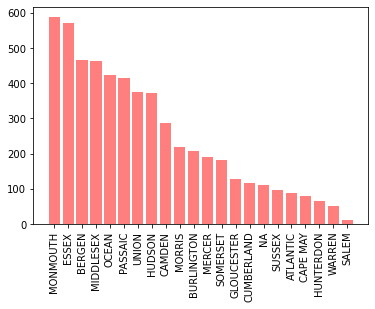

In [27]:
#coorelation between number of cases and hospitalisation
#

county = county_df.index.to_list()

cases = county_df["Total Number of Cases per County"]
x_axis = np.arange(len(cases))
plt.xticks(rotation='vertical')
plt.bar(county, cases, color='r', alpha=0.5, align="center")

In [ ]:
# Give our chart some labels and a tile
plt.title("Number of Covid Cases per NJ County")
plt.xlabel("County Names")
plt.ylabel("Number of Cases")